In [97]:
# importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
# import the data set on coronary heard disease
df = pd.read_csv('heart.csv')

Data description:
<li>sbp: Systolic blood pressure
<li>tobacco: Cumulative tobacco consumption, in kg
<li>ldl: Low-density lipoprotein cholesterol
<li>adiposity: Adipose tissue concentration
<li>famhist: Family history of heart disease (1=Present, 0=Absent)
<li>typea: Score on test designed to measure type-A behavior
<li>obesity: Obesity
<li>alcohol: Current consumption of alcohol
<li>age: Age of subject
<li>chd: Coronary heart disease at baseline; 1=Yes 0=No

In [3]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Note that you would be able to view that there are no nulls, so no imputation required. This data is clean before published

In [241]:
df.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320,0.584416,0.415584
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313,0.493357,0.493357
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000,0.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000,0.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000,1.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000,1.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000,1.000000,1.000000


In [7]:
#create a onehot vector for family history 
df = pd.get_dummies(df, prefix='famhist')

In [12]:
# separate label and features
y = df['chd']
X = df.drop(['chd'],axis=1)

In [13]:
# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3 )

In [14]:
# Try XBG classifier with GridsearchCV (with deafult CV)
from xgboost import XGBClassifier

In [98]:
parameters = {'n_estimators':[1,2,4,8,16],
              'learning_rate':[100, 10, 1, 0.1, 0.001, 0.001, 0.0001, 0.00001],
              'gamma':[1,0.1, 0.01, 0.001, 0.0001],
              'reg_alpha ':[100, 10, 1, 0.1, 0.001, 0.0001],
              'reg_lambda':[100, 10, 1, 0.1, 0.001, 0.0001] 
             }

In [101]:
model_xgb = XGBClassifier()
model_xgb_gs = GridSearchCV(model_xgb, parameters)
fit_xgb = model_xgb_gs.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [102]:
model_xgb_gs.score(X_test, y_test)

0.7482014388489209

<h4>XGB Classifier with grid CV was able to obtain 74.82% accuracy, see if this can be improved by capturing the best estimator and tweaking it further

In [104]:
model_xgb_gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=4, n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_alpha =100, reg_lambda=10,
       scale_pos_weight=1, seed=None, silent=None, subsample=1,
       verbosity=1)

In [145]:
model_xgb_updt = XGBClassifier(base_score=0.51, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=4, n_jobs=3, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha =0, reg_lambda=10,
       scale_pos_weight=1, seed=None, silent=None, subsample=1,
       verbosity=1)

In [146]:
model_xgb_updt.fit(X_train, y_train)
model_xgb_updt.score(X_test, y_test)

0.7553956834532374

<h4>Updating the regularization parameters yeilds a littel better results

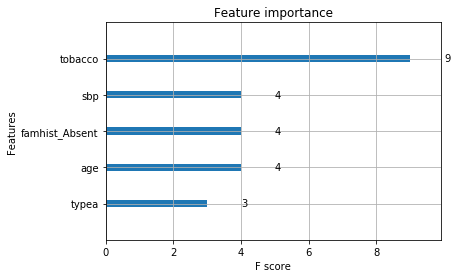

In [165]:
from xgboost import plot_importance

plot_importance(model_xgb_updt, max_num_features=10)

<h4> Logistic regression was able to surpass the performance of XGBoost

In [242]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear', penalty='l1', max_iter = 1000)
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.7697841726618705

<h4>Create another dataframe with Famhist as single feature (to see if this approach is yeilding better results compared to onehot encoding) 

In [170]:
df1 = df.copy()

In [181]:
df1 = pd.read_csv('heart.csv')

In [182]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['famhist']= le.fit_transform(df1['famhist'])

In [183]:
df1.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [184]:
from sklearn.preprocessing import StandardScaler

In [244]:
Y1 = df1['chd'].values
X1 = df1.drop('chd', axis=1)
# sc = StandardScaler()
# X1=sc.fit_transform(X1)

In [245]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3)

<h4> Use th best XGBclassifier model obtained in previous iteration

In [246]:
model_xgb_updt.fit(X1_train, y1_train)

XGBClassifier(base_score=0.51, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=1, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=4, n_jobs=3, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=10, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [247]:
model_xgb_updt.score(X1_test, y1_test)

0.7769784172661871

<h4> XGB classifier (with gridsearchCV in run again)

In [248]:
xgb_le = model_xgb_gs.fit(X1_train, y1_train)
model_xgb_gs.score(X1_test, y1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7338129496402878

<h4>Running Logistic Regression on the new Data set

In [260]:
model_lr1 = LogisticRegression(solver='liblinear', penalty='l1', max_iter = 1000)
model_lr1.fit(X1_train, y1_train)
model_lr1.score(X1_test, y1_test)

0.762589928057554

In [268]:
from sklearn.svm import SVC
svc = SVC(C=1)
svc.fit(X1_train, y1_train)
svc.score(X1_test, y1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6762589928057554

In [269]:
from sklearn.ensemble import RandomForestClassifier
model_rfc1 = RandomForestClassifier(max_leaf_nodes=100)
model_rfc1.fit(X1_train, y1_train)
model_rfc1.score(X1_test, y1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7050359712230215

In [270]:
model_rfc2 = RandomForestClassifier(max_leaf_nodes=100)
model_rfc2.fit(X_train, y_train)
model_rfc2.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.697841726618705

In [271]:
from sklearn.naive_bayes import BernoulliNB
model_nb1 = BernoulliNB()
model_nb2 = BernoulliNB()

In [272]:
model_nb1.fit(X_train, y_train)
model_nb1.score(X_test, y_test)

0.7553956834532374

In [255]:
model_nb2.fit(X1_train, y1_train)
model_nb2.score(X1_test, y1_test)

0.7050359712230215

<h2> For most of the models having a single column (Label encoding) worked better than onehot encoding in this case. so far the best result was obtained by XGBClassifier with GridSearchCV (77.69%)